# ESRB Rating Prediction Using Supervised Machine Learning

ESRB ratings are a way to label games as appropriate for certain ages based on the games' content. <br>
But just how well do the content tags (e.g., cartoon violence) correspond with the age ratings? <br>
Do certain types of content immediately cause a game to be rated T, or R? <br>
If the ratings are truly systematic, then perhaps they can be classified by machine learning systems.<br>

# Table of Contents
1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
2. [Naive Bayes](#Naive-Bayes)
3. [SVM](#SVM)
4. [Decision Trees and Random Forests](#Decision-Trees-and-Random-Forests)
5. [Conclusions](#Conclusions)

# Exploratory Data Analysis
The first step is to load and inspect the data.

In [1]:
import pandas
esrb = pandas.read_csv("Video_games_esrb_rating.csv")
esrb

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


We see that the training data consists of 1895 games' ratings and content tags. <br>
There are 34 columns: 1 game title, 1 console tag, 31 content tags, and 1 ESRB rating. <br>
The titles are strings, the ratings categorical, and the other features binary/dummy variables.

In [2]:
esrb['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

We see that there are only 4 types of ESRB ratings given in this dataset: E, ET, T, and M. <br>
E - Everyone <br>
ET - Everyone 10+ <br>
T - Teen <br>
M - Mature 17+<br>
We can also see that the dataset is imbalanced. There are many more games rated T than E, ET, or R. <br>
Something like bootstrap resampling, undersampling, or SMOTE might be helpful here.

In [3]:
esrb.isnull().values.any()

False

A quick check also tells us that there are no missing values in the data. <br>
It's already pretty much clean. Since the features are 0/1, normalization and standardization won't be necessary.<br> <br>
Next, visualizing the content tags' correlations might be useful. <br>
First we'll get a copy of the dataframe with only content tags. Then we'll plot them.

In [4]:
# Create a copy of the content tags
esrb_tags = esrb.iloc[:, 2:33].copy()

In [5]:
# View the correlation values
esrb_tags.corr()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
alcohol_reference,1.000000,0.001153,-0.078723,-0.036286,0.054970,-0.001745,0.009118,-0.075557,0.148086,-0.025514,...,-0.005368,-0.043297,-0.025596,-0.003547,-0.076622,0.007684,-0.001347,0.164599,-0.029137,-0.040217
animated_blood,0.001153,1.000000,-0.054686,-0.038232,-0.014202,-0.000764,0.154219,-0.027989,0.094402,0.050214,...,-0.011636,-0.018967,-0.024862,-0.026972,-0.020440,-0.019415,-0.036753,0.072105,0.029670,0.017046
blood,-0.078723,-0.054686,1.000000,-0.206437,-0.067592,-0.080343,-0.041479,-0.173801,0.089358,0.033477,...,0.047414,0.084194,0.071050,0.105880,0.291957,-0.037207,0.090421,-0.038687,-0.018533,0.007284
blood_and_gore,-0.036286,-0.038232,-0.206437,1.000000,-0.042122,-0.027978,0.118566,-0.171432,0.289246,0.097976,...,-0.002132,0.138011,0.124611,0.012603,0.220318,0.336910,-0.025282,-0.009979,0.053693,0.063320
cartoon_violence,0.054970,-0.014202,-0.067592,-0.042122,1.000000,-0.017009,0.014797,-0.075072,-0.051667,-0.049149,...,-0.016317,-0.026596,0.030661,-0.022569,-0.051667,-0.027225,0.007645,0.043213,0.012657,-0.036855
crude_humor,-0.001745,-0.000764,-0.080343,-0.027978,-0.017009,1.000000,-0.045542,-0.077018,0.085252,-0.061018,...,0.013080,-0.032395,-0.029236,0.317392,-0.066149,0.016318,-0.029767,-0.011759,-0.030407,-0.005491
drug_reference,0.009118,0.154219,-0.041479,0.118566,0.014797,-0.045542,1.000000,-0.101056,0.019599,0.174765,...,0.053712,0.027456,0.089050,0.064191,0.162238,0.071671,0.037812,-0.024093,-0.024093,-0.002522
fantasy_violence,-0.075557,-0.027989,-0.173801,-0.171432,-0.075072,-0.077018,-0.101056,1.000000,-0.167181,-0.000897,...,-0.050356,-0.044318,-0.038499,-0.040787,-0.072573,-0.054735,0.082195,0.003901,0.003901,-0.086881
intense_violence,0.148086,0.094402,0.089358,0.289246,-0.051667,0.085252,0.019599,-0.167181,1.000000,-0.111730,...,-0.042334,0.002844,0.021872,0.006457,0.098834,0.386323,-0.006898,0.058322,0.005943,-0.008710
language,-0.025514,0.050214,0.033477,0.097976,-0.049149,-0.061018,0.174765,-0.000897,-0.111730,1.000000,...,0.019290,-0.028300,0.089083,0.042541,0.019827,-0.012388,0.083706,-0.003340,0.023882,-0.021470


<AxesSubplot:>

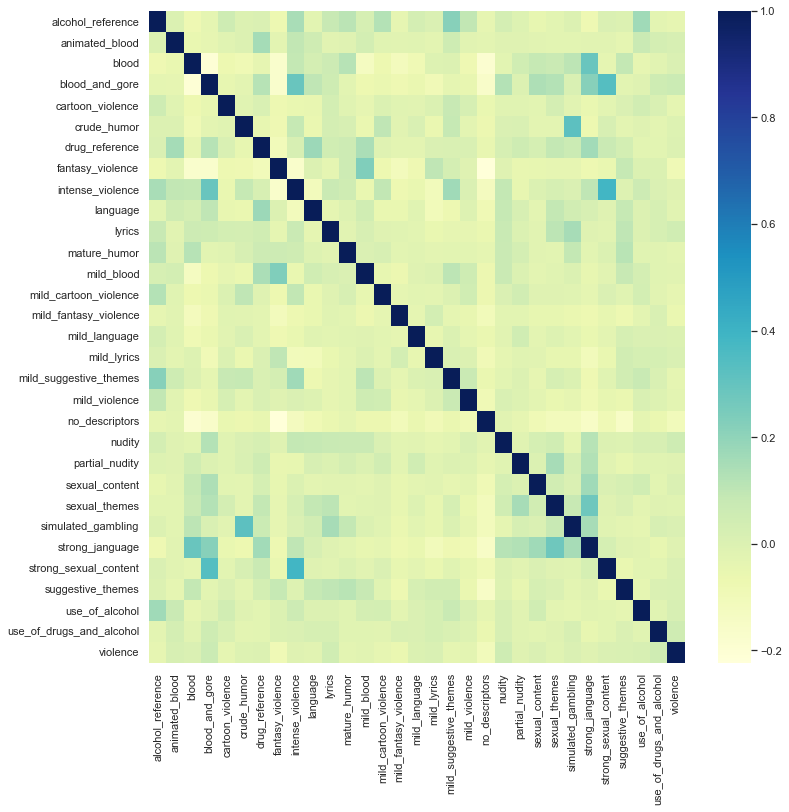

In [6]:
# Plot a correlation heatmap
import seaborn

seaborn.set(rc = {'figure.figsize':(12,12)})
seaborn.heatmap(esrb_tags.corr(), cmap="YlGnBu")

There are many conclusions, some unintuitive, that can be seen in this plot. <br><br>
-blood and blood_and_gore aren't highly correlated, so they're probably treated as substitutes <br>
-simulated_gambling and crude_humor go hand in hand <br>
-strong_sexual_content often pairs with blood_and_gore and intense_violence <br>
-fantasy_violence tends to correlate more with mild_blood <br>
-alcohol_reference and use_of_alcohol aren't highly correlated and are probably treated as substitutes <br>
-strong_language often goes with some level of nudity or sexual themes <br>
-strong_language in general seems to correlate with other content tags

# Naive Bayes

In [39]:
# Get copies of the relevant parts of the data frame
# X contains the features and y contains the labels

X = esrb.iloc[:, 2:33].copy()
y = esrb.loc[:, "esrb_rating"].copy()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X, y)

GaussianNB()

In [52]:
# Cross validation is a good way to check model validity
# Set cv=5 for stratified 5-fold cross validation
# Stratified k-fold can help with imbalanced data
nb_scores = cross_val_score(nb_clf, X, y, cv=5)

# View the cross validation scores
print(f"Cross Validation Scores: {nb_scores}")

# View the average of the CV scores
print(f"Mean Cross Validation Score: {nb_scores.mean()}")

Cross Validation Scores: [0.55408971 0.63852243 0.57783641 0.56200528 0.56992084]
Mean Cross Validation Score: 0.5804749340369393


The scores across the folds are relatively consistent, so there doesn't seem to be massive overfitting. <br>
We can probably expect 55-60% accuracy.

In [ ]:
# Tests the Naive Bayes classifier on the test set

# Load the test set
esrb_test = pandas.read_csv("test_esrb.csv")

# Split it into features and labels
X_test = esrb_test.iloc[:, 2:33].copy()
y_test = esrb_test.loc[:, "esrb_rating"].copy()

In [58]:
from sklearn.metrics import accuracy_score

# Use the model to predict the test set's ESRB ratings
nb_predictions = nb_clf.predict(X_test)

# Compare the predictions with the test set labels
nb_score = accuracy_score(y_test, nb_predictions)

# View the score
print(nb_score)

0.56


The test performance of the Naive Bayes model is about what we expected. <br>
With that in mind, it's generally a good idea to examine the model performance in more detail. <br>
A good way to do this is by looking at a confusion matrix, as well as precision and recall.

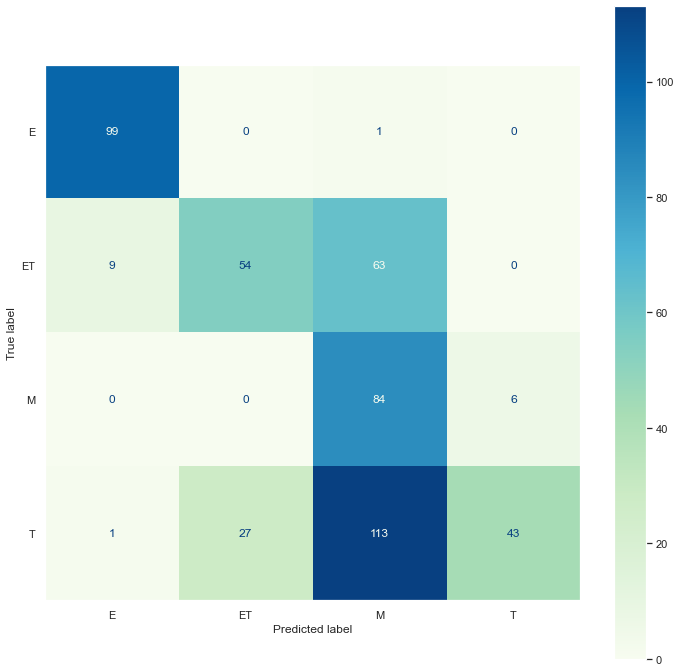

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score

# Create and visualize the confusion matrix
# The second line disables the hideous crosshair grids
nb_conf = plot_confusion_matrix(nb_clf, X_test, y_test, cmap="GnBu")
plt.grid(False)

In [80]:
# Get precision and recall values

print(f"Precision: {precision_score(y_test, nb_predictions, average='macro')}")
print(f"Recall: {recall_score(y_test, nb_predictions, average='macro')}")

Precision: 0.6935784120671362
Recall: 0.6464001035196687


From the confusion matrix, it's easy to see that the model classifies E and M rated games very accurately. <br>
The problem with this model is that approximately half of ET games are predicted as M. <br>
Similarly, T games are very often misclassified as M, and also misclassified as ET. <br>
This is reflected in the lower recall score. <br>
Considering that M was the minority class, it's somewhat surprising that it gets so many misclassifications.

# SVM

Since the Naive Bayes classifier only got 56%, it won't hurt to try out other algorithms like SVM.

In [85]:
# There are quite a few hyperparameter choices to make with SVMs, so a grid search may help

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# The grid of parameters to sweep over
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

# Construct the SVM & grid search, and then fit
svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_param_grid, return_train_score=True)

svm_grid_search.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True)

In [86]:
# View the best parameters
print(svm_grid_search.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Grid search finds that the best parameters for the SVM are C=1, gamma='scale', and kernel='rbf' <br>
Interestingly, these are the default parameters for SVC. Coincidence? I think not. <br>
In any case, let's fit the model with these parameters.

In [87]:
# Instantiate and fit the SVM model
svm_clf = SVC()
svm_clf.fit(X, y)

SVC()

In [88]:
# Try some 5-fold cross validation
svm_scores = cross_val_score(svm_clf, X, y, cv=5)

# View the cross validation scores
print(f"Cross Validation Scores: {svm_scores}")
# View the average of the scores
print(f"Mean Cross Validation Score: {svm_scores.mean()}")

Cross Validation Scores: [0.84168865 0.86807388 0.86279683 0.87862797 0.90237467]
Mean Cross Validation Score: 0.8707124010554089


The scores using the SVM are much better than those from the Naive Bayes. <br>
SVM has scores ranging from 84 to 90, with the average coming in just over 87.

In [89]:
# Check the accuracy of the predictions for the test set
svm_predictions = svm_clf.predict(X_test)
svm_score = accuracy_score(y_test, svm_predictions)
print(svm_score)

0.854


Precision: 0.8727306064433107
Recall: 0.8449102829537612


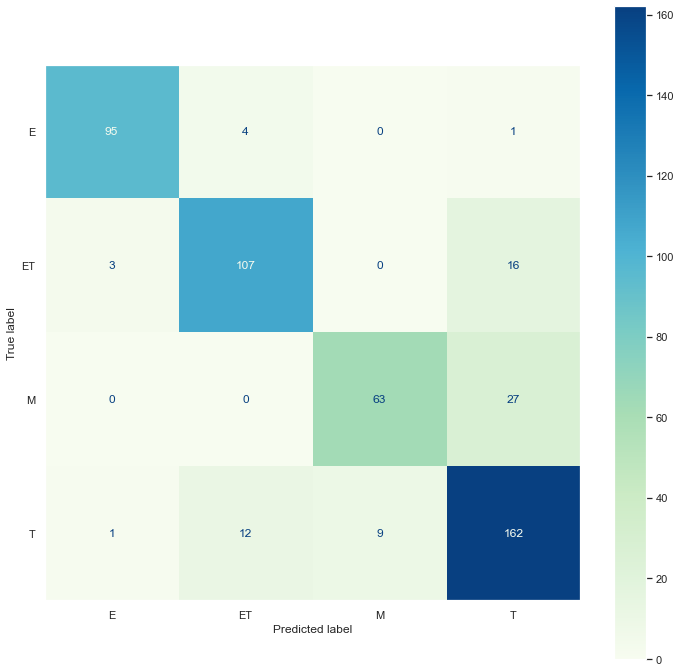

In [90]:
# View the precision, recall, and confusion matrix

print(f"Precision: {precision_score(y_test, svm_predictions, average='macro')}")
print(f"Recall: {recall_score(y_test, svm_predictions, average='macro')}")

svm_conf = plot_confusion_matrix(svm_clf, X_test, y_test, cmap="GnBu")
plt.grid(False)

Generally, the SVM approach fared much better than Naive Bayes, increasing classification accuracy by about 20%. <br>
From the confusion matrix, we see the higher scores come from the ET and T games not being largely misclassified. <br>
However, there is still a persistent issue with T being confused for ET. Also, M is confused for T more often than with Naive Bayes. <br>

# Decision Trees and Random Forests

Other common ML techniques include decision trees, as well as random forests.

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree classifier
dt = DecisionTreeClassifier()

# Construct the hyperparameter grid to search over
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 8, 16]
    }

# Perform the grid search
dt_grid_search = GridSearchCV(dt, dt_param_grid)
dt_grid_search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 6, 8]})

In [112]:
# View the best combination of parameters
print(dt_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Using grid search, we find that the best criterion parameter is entropy. <br>
The other parameters (max depth, features, samples leaf, samples split) are all defaults.

In [113]:
# Instantiate and fit the Decision Tree model
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [114]:
# Cross validation check
dt_scores = cross_val_score(dt_clf, X, y, cv=5)

# View the cross validation scores
print(f"Cross Validation Scores: {dt_scores}")

# View the average of the scores
print(f"Mean Cross Validation Score: {dt_scores.mean()}")

Cross Validation Scores: [0.81002639 0.84960422 0.86279683 0.87862797 0.87598945]
Mean Cross Validation Score: 0.8554089709762532


Overall, we see scores ranging from just over 81 to just under 88, with an average of 85.5. <br>
This is weaker than what we got using an SVM, but only somewhat.

In [115]:
# Check the accuracy of the predictions on the test set
dt_predictions = dt_clf.predict(X_test)
dt_score = accuracy_score(y_test, dt_predictions)
print(dt_score)

0.834


Precision: 0.8477591540179672
Recall: 0.8300250172532782


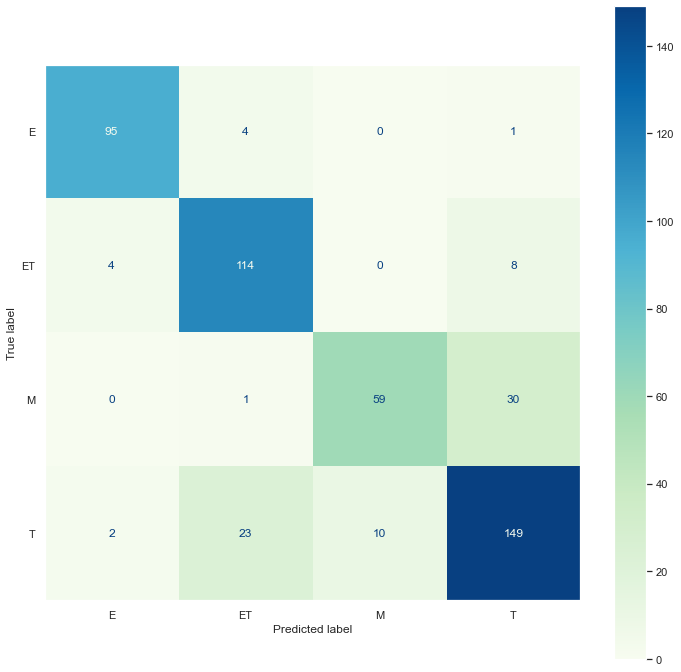

In [116]:
# View the precision, recall, and confusion matrix
print(f"Precision: {precision_score(y_test, dt_predictions, average='macro')}")
print(f"Recall: {recall_score(y_test, dt_predictions, average='macro')}")

dt_conf = plot_confusion_matrix(dt_clf, X_test, y_test, cmap="GnBu")
plt.grid(False)

Again, we see that the issues lie in the misclassification of T and M rated games. <br>
Overall, decision trees performed worse than SVM with all classes except ET, which was slightly better. <br><br>
Now, let's try using a Random Forest.

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier and do another grid search
rf = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 8, 16]
    }

# Perform the grid search
rf_grid_search = GridSearchCV(rf, rf_param_grid)
rf_grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150]})

In [118]:
# View the best combination of parameters
print(rf_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}


This grid search was the most helpful so far. <br>
It came up with non-default optimal values for criterion, depth, features, samples split and estimators. <br>
From these values, we can assume further grid searching could further improve results <br>
(likely by trying a greater max depth and number of estimators).

In [119]:
# Instantiate the model with the best parameters and fit it
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_split=2, n_estimators=150)
rf_clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=150)

In [120]:
# Cross validation
rf_scores = cross_val_score(rf_clf, X, y, cv=5)

# View the cross validation scores
print(f"Cross Validation Scores: {rf_scores}")

# View the average of the scores
print(f"Mean Cross Validation Score: {rf_scores.mean()}")

Cross Validation Scores: [0.823219   0.86279683 0.86015831 0.87862797 0.89182058]
Mean Cross Validation Score: 0.8633245382585752


In [121]:
# Check the accuracy of the predictions on the test set
rf_predictions = rf_clf.predict(X_test)
rf_score = accuracy_score(y_test, rf_predictions)
print(rf_score)

0.848


Precision: 0.8674400723654455
Recall: 0.8382850241545894


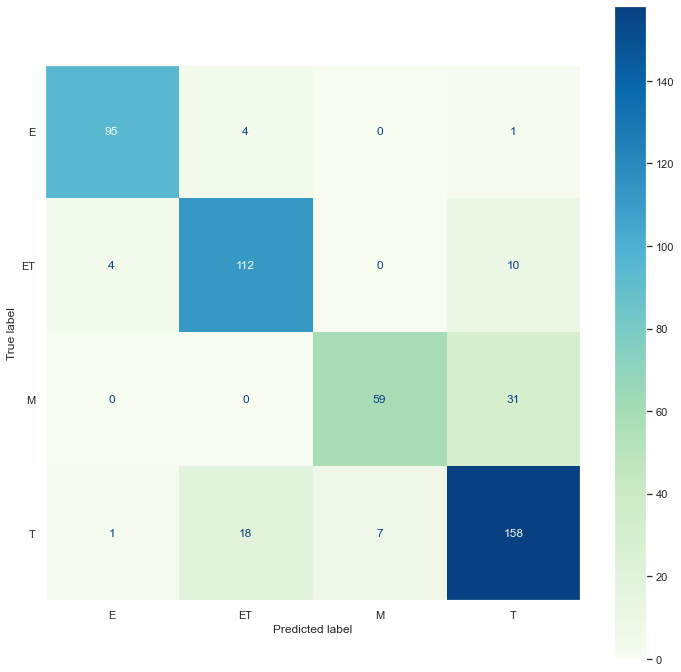

In [122]:
# View the precision, recall, and confusion matrix yet again
print(f"Precision: {precision_score(y_test, rf_predictions, average='macro')}")
print(f"Recall: {recall_score(y_test, rf_predictions, average='macro')}")

rf_conf = plot_confusion_matrix(rf_clf, X_test, y_test, cmap="GnBu")
plt.grid(False)

Overall, the random forest approach performed better than the decision tree approach in all aspects <br>
(precision, recall, and accuracy), albeit only by a small margin in each case. The ET as T, M as T, <br>
and T as ET misclassifications also persist when using this method.

# Conclusions

Amongst these techniques, the SVM performed best with a test classification accuracy of 85.4%. <br>
While the Decision Tree and Random Forest approaches were also promising, the Naive Bayes approach fell far behind. <br>
It is possible that different data permutations (i.e., random seed choices) may change the results. if treated as <br>
another parameter to optimize through grid search. <br><br>

Importantly, these were just a few supervised machine learning methods. Attempting the classification with unsupervised <br>
methods like clustering, more advanced deep learning methods, or additional ensemble methods may produce good/better results. <br><br>

Generally, it seems very possible to use machine learning to classify ESRB ratings. <br>
The different approaches did well in correctly classifying games as belonging to E and ET. <br>
While T and M games were more problematic, their classification still performed well.